In [1]:
import nltk
nltk.download('stopwords')
import re, string, unicodedata  
import nltk
from nltk import word_tokenize, sent_tokenize 
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#preprocessing
def removeStopword(str):
    factory = StopWordRemoverFactory()
    more_stopword = ['nya','kali', 'rt','hi','u','all']
    stopwords = factory.get_stop_words()+more_stopword
    word_tokens = str.split()
    filtered_sentence = [w for w in word_tokens if not w in stopwords]
    return ' '.join(filtered_sentence)
#remove sentence which contains only one word
def removeSentence(str): 
    word = str.split()
    wordCount = len(word)
    if(wordCount<=4):
        str = ''
    
    return str
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
       
    return str
def preprocessing(str):
    str = removeSentence(str)
    str = cleaning(str)
    str = removeStopword(str)
    
    return str

In [3]:
import pandas as pd
data = pd.read_csv('penyakittext.csv')
data

,datetime,id,tweet
0,2020-10-18 13:04:42,1317813858954735617,"Ayam sayur juga rupanya, kena penyakit post po..."
1,2020-10-18 13:04:23,1317813777862029312,"RT @afrina_amira: Hi Guys , minta tolong u all..."
2,2020-10-18 13:04:17,1317813752503226372,RT @cewehijrah: 3. PENYAKIT\nMisalnya ada peny...
3,2020-10-18 13:04:10,1317813726335037441,Contohnya menghina dik willy yg megang rokokny...
4,2020-10-18 13:04:00,1317813682764615682,Buah mengkudu dapat digunakan untuk mengatasi ...
...,...,...,...
345,2020-10-18 12:02:16,1317798148593442816,RT @HausofHilton: Sekali Biasanya.\n\nTetapi v...
346,2020-10-18 12:01:57,1317798066800357377,"RT @NiniNell: Yang bagi sedekah rakyat, yang b..."
347,2020-10-18 12:01:39,1317797991894274048,@hobak_alt dokter pun bingung deh kayanya ini ...
348,2020-10-18 12:01:25,1317797934616858624,RT @aliffshanusi: 𝗦𝗲𝗻𝗮𝗿𝗮𝗶 𝟱𝟱 𝗣𝗲𝗻𝘆𝗮𝗸𝗶𝘁 𝗞𝗿𝗶𝘁𝗶𝗸𝗮𝗹...


In [4]:
data = data[['tweet']]
data

,tweet
0,"Ayam sayur juga rupanya, kena penyakit post po..."
1,"RT @afrina_amira: Hi Guys , minta tolong u all..."
2,RT @cewehijrah: 3. PENYAKIT\nMisalnya ada peny...
3,Contohnya menghina dik willy yg megang rokokny...
4,Buah mengkudu dapat digunakan untuk mengatasi ...
...,...
345,RT @HausofHilton: Sekali Biasanya.\n\nTetapi v...
346,"RT @NiniNell: Yang bagi sedekah rakyat, yang b..."
347,@hobak_alt dokter pun bingung deh kayanya ini ...
348,RT @aliffshanusi: 𝗦𝗲𝗻𝗮𝗿𝗮𝗶 𝟱𝟱 𝗣𝗲𝗻𝘆𝗮𝗸𝗶𝘁 𝗞𝗿𝗶𝘁𝗶𝗸𝗮𝗹...


In [5]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 

In [6]:
data = data['tweet'].apply(lambda x: preprocessing(x))
print(data)

0      ayam sayur rupanya kena penyakit post power sy...
1      afrina amira guys minta semua adik kawan ain n...
2      cewehijrah penyakit misalnya pribadi jangan sa...
3      contohnya menghina dik willy yg megang rokokny...
4      buah mengkudu digunakan mengatasi penyakit hip...
                             ...                        
345    hausofhilton sekali biasanya virus varicella z...
346    nininell sedekah rakyat bayar gaji dinosaur ra...
347    hobak alt dokter bingung deh kayanya penyakit ...
348    aliffshanusi senarai penyakit kritikal dibenar...
349    afrina amira guys minta semua adik kawan ain n...
Name: tweet, Length: 350, dtype: object


In [7]:
text_list =  [i.split() for i in data]
print(len(text_list))
print(text_list)

350
[['ayam', 'sayur', 'rupanya', 'kena', 'penyakit', 'post', 'power', 'syndrome', 'lae', 'bah'], ['afrina', 'amira', 'guys', 'minta', 'semua', 'adik', 'kawan', 'ain', 'natasya', 'tahun', 'menghidap', 'penyakit', 'scoliosis'], ['cewehijrah', 'penyakit', 'misalnya', 'pribadi', 'jangan', 'sakit', 'umum', 'pilek', 'batuk', 'demam', 'kalo'], ['contohnya', 'menghina', 'dik', 'willy', 'yg', 'megang', 'rokoknya', 'ky', 'org', 'terkena', 'penyakit', 'mental'], ['buah', 'mengkudu', 'digunakan', 'mengatasi', 'penyakit', 'hipertensi', 'demam', 'influenza', 'batuk', 'sakit', 'perut', 'penampilanmu'], ['husninidhom', 'allah', 'perbaikilah', 'keadaan', 'mudahkanlah', 'urusan', 'sembuhkanlah', 'penyakit', 'lunaskanlah', 'hutang', 'hutang'], ['bts', 'twt', 'bismillah', 'wish', 'me', 'luck', 'semoga', 'rezeki', 'aminn', 'makasih', 'bun', 'udah', 'ngadain', 'ga', 'semoga', 'mama'], ['erzavindaf', 'iya', 'selingkuh', 'penyakit'], ['afrina', 'amira', 'guys', 'minta', 'semua', 'adik', 'kawan', 'ain', 'nata

In [8]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [9]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(1408 unique tokens: ['ayam', 'bah', 'kena', 'lae', 'post']...)


In [10]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

In [11]:
print(len(doc_term_matrix))
print(doc_term_matrix[1])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

350
[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1)]


In [12]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=300)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

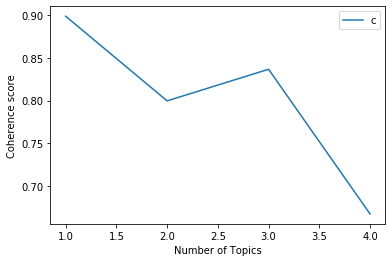

In [13]:
start=1
limit=5
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.898829
Num Topics = 2  has Coherence Value of 0.799648
Num Topics = 3  has Coherence Value of 0.836692
Num Topics = 4  has Coherence Value of 0.667149


In [15]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=3) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.007*"berbahaya_merupakan" + 0.007*"berjangkit_bawaan" + 0.007*"virus_cukup" + 0.007*"smallpox_merupakan" + 0.007*"merupakan" + 0.004*"bawaan" + 0.004*"cukup" + 0.004*"bukti_keja" + 0.004*"berjangkit" + 0.004*"keja"
Topic: 1 Word: 0.019*"semua_adik" + 0.018*"natasya_tahun" + 0.010*"afrina_amira" + 0.010*"menghidap" + 0.010*"guys_minta" + 0.010*"adik" + 0.010*"scoliosis" + 0.010*"menghidap_penyakit" + 0.009*"guys" + 0.009*"afrina"
Topic: 2 Word: 0.009*"natasya_tahun" + 0.008*"semua_adik" + 0.006*"teman_teman" + 0.006*"aku_terkena" + 0.005*"ain" + 0.005*"kawan_ain" + 0.005*"kawan" + 0.005*"semua_adik_kawan_ain" + 0.005*"natasya" + 0.005*"guys"


In [16]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


In [17]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'visualisasi-penyakit-topic-modeling.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.056151 -0.016452       1        1  42.556747
0      0.067485 -0.009355       2        1  33.138906
2     -0.011334  0.025807       3        1  24.304347, topic_info=                    Term       Freq      Total Category  logprob  loglift
22         natasya_tahun  12.000000  12.000000  Default  30.0000  30.0000
25            semua_adik  12.000000  12.000000  Default  29.0000  29.0000
223  berbahaya_merupakan   3.000000   3.000000  Default  28.0000  28.0000
225    berjangkit_bawaan   3.000000   3.000000  Default  27.0000  27.0000
236          virus_cukup   3.000000   3.000000  Default  26.0000  26.0000
..                   ...        ...        ...      ...      ...      ...
16            guys_minta   1.237290   6.344035   Topic3  -5.4489  -0.2201
19             menghidap   1.220098   6.350764   Topic3  -5.4629  -0.2351
9                   a